In [5]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [6]:
# import dataset

df = pd.read_csv('../../Dataset/onehot.csv')
# drop Name Column
df.drop('Name', axis=1, inplace=True)

# randomize the rows
df = df.sample(frac=1).reset_index(drop=True)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df['Class'], test_size=0.2, random_state=42)

Random Forest

In [8]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
rf.fit(X_train, y_train)
y_predicted = rf.predict(X_test)

In [9]:
from sklearn.metrics import roc_curve, roc_auc_score
# PREDICTING PROBABILITY
y_pred_prob = rf.predict_proba(X_test)[:,1]
lr_auc = roc_auc_score(y_test, y_pred_prob)
lr_auc


0.9875041377027476

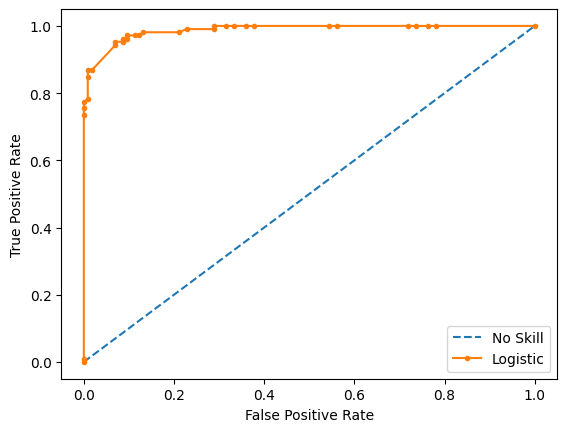

In [10]:
from matplotlib import pyplot
from numpy import sqrt, argmax, save
import numpy as np
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

Random_Forest: f1=0.866 auc=0.988
0.4818181818181818


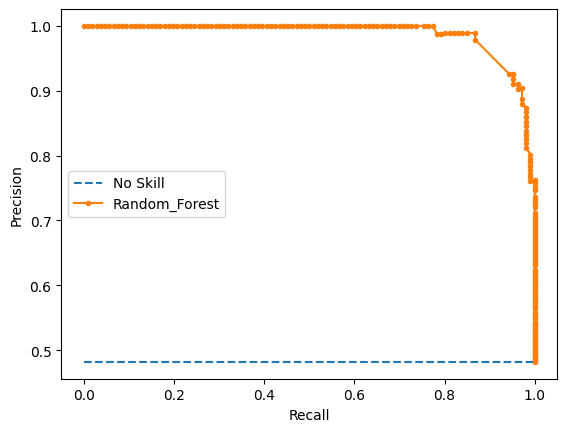

In [11]:
from sklearn.metrics import auc, precision_recall_curve, f1_score
from matplotlib import pyplot
lr_precision, lr_recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
lr_f1, lr_auc = f1_score(y_test, y_predicted), auc(lr_recall, lr_precision)
# summarize scores
print('Random_Forest: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
fscore = (2 * lr_precision * lr_recall) / (lr_precision + lr_recall)
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
print(no_skill)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Random_Forest')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

Logistic_Regression


In [12]:
# Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_predicted1 = lr.predict(X_test)

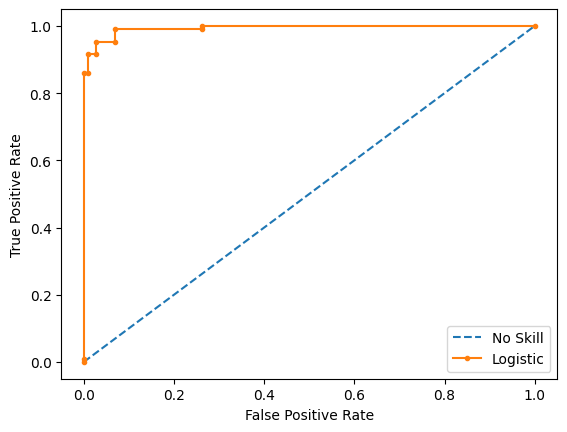

In [13]:
# roc curve for lgistic regression
from sklearn.metrics import roc_curve, roc_auc_score
# PREDICTING PROBABILITY
y_pred_prob1 = lr.predict_proba(X_test)[:,1]
lr_auc1 = roc_auc_score(y_test, y_pred_prob1)
lr_auc1

from matplotlib import pyplot
from numpy import sqrt, argmax, save
import numpy as np
# calculate roc curves
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr1, tpr1, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()


Logistic: f1=0.957 auc=0.993
0.4818181818181818


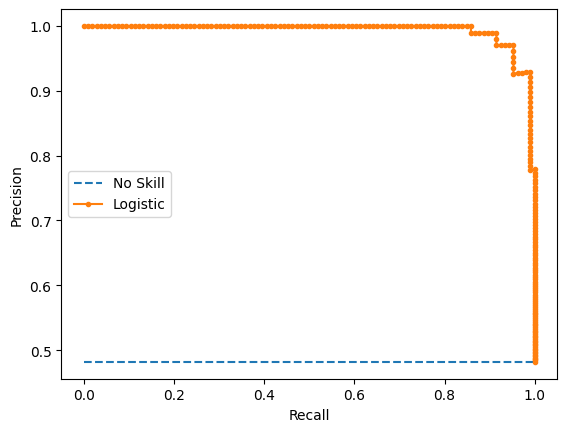

In [14]:
# presision recall graph
from sklearn.metrics import auc, precision_recall_curve, f1_score
from matplotlib import pyplot
lr_precision1, lr_recall1, thresholds1 = precision_recall_curve(y_test, y_pred_prob1)
lr_f1, lr_auc1 = f1_score(y_test, y_predicted1), auc(lr_recall1, lr_precision1)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc1))
fscore = (2 * lr_precision1 * lr_recall1) / (lr_precision1 + lr_recall1)
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
print(no_skill)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall1, lr_precision1, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()


SVM

In [15]:
# SVM
svm = SVC(kernel="linear")
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)


In [16]:
# roc curve for SVM
from sklearn.metrics import roc_curve, roc_auc_score
# PREDICTING PROBABILITY
y_pred_prob2 = svm.decision_function(X_test)
lr_auc2 = roc_auc_score(y_test, y_pred_prob2)
lr_auc2


0.9905660377358492

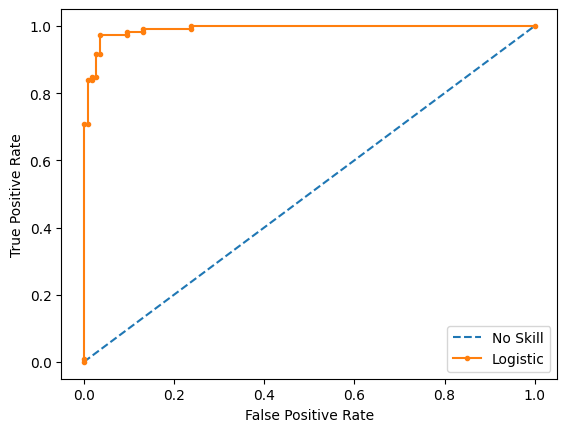

In [17]:

from matplotlib import pyplot
from numpy import sqrt, argmax, save
import numpy as np
# calculate roc curves
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr2, tpr2, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()


SVM: f1=0.942 auc=0.990
0.4818181818181818


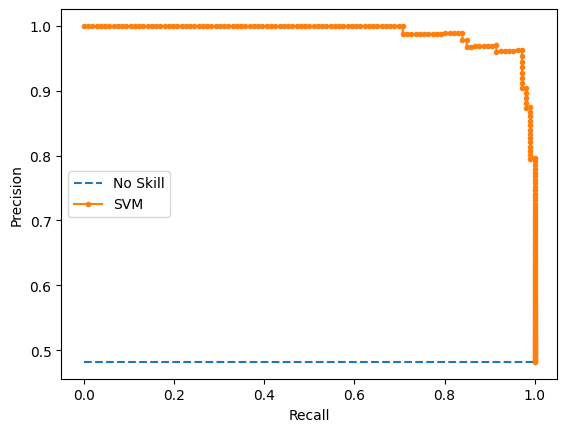

In [18]:

# presision recall graph
from sklearn.metrics import auc, precision_recall_curve, f1_score
from matplotlib import pyplot
lr_precision2, lr_recall2, thresholds2 = precision_recall_curve(y_test, y_pred_prob2)
lr_f1, lr_auc2 = f1_score(y_test, y_pred), auc(lr_recall2, lr_precision2)
# summarize scores
print('SVM: f1=%.3f auc=%.3f' % (lr_f1, lr_auc2))
fscore = (2 * lr_precision2 * lr_recall2) / (lr_precision2 + lr_recall2)
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
print(no_skill)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall2, lr_precision2, marker='.', label='SVM')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()


Decision Tree

In [19]:
# Decision Tree

dt = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
dt.fit(X_train, y_train)
y_predicted = dt.predict(X_test)


In [20]:
# roc curve for Decision Tree
from sklearn.metrics import roc_curve, roc_auc_score
# PREDICTING PROBABILITY
y_pred_prob3 = dt.predict_proba(X_test)[:,1]
lr_auc3 = roc_auc_score(y_test, y_pred_prob3)
lr_auc3

0.9594505130751406

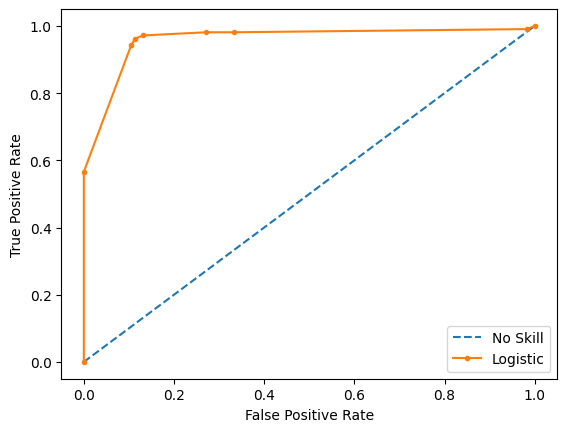

In [21]:

from matplotlib import pyplot
from numpy import sqrt, argmax, save
import numpy as np
# calculate roc curves
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr3, tpr3, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()


Decision Tree: f1=0.917 auc=0.966
0.4818181818181818


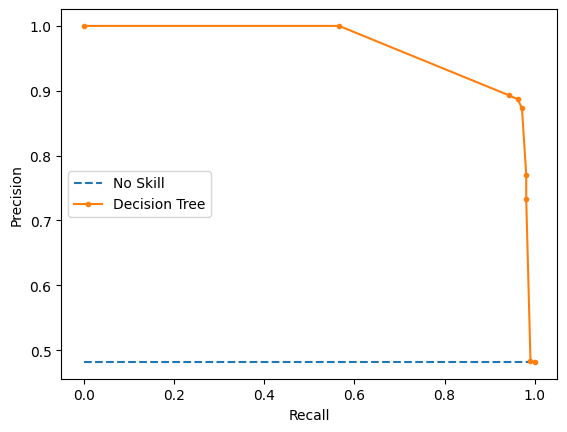

In [22]:

# presision recall graph
from sklearn.metrics import auc, precision_recall_curve, f1_score
from matplotlib import pyplot
lr_precision3, lr_recall3, thresholds3 = precision_recall_curve(y_test, y_pred_prob3)
lr_f1, lr_auc3 = f1_score(y_test, y_predicted), auc(lr_recall3, lr_precision3)
# summarize scores
print('Decision Tree: f1=%.3f auc=%.3f' % (lr_f1, lr_auc3))
fscore = (2 * lr_precision3 * lr_recall3) / (lr_precision3 + lr_recall3)
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
print(no_skill)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall3, lr_precision3, marker='.', label='Decision Tree')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

In [23]:
# knn implememt
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_predicted = knn.predict(X_test)

In [24]:

# roc curve for knn
from sklearn.metrics import roc_curve, roc_auc_score
# PREDICTING PROBABILITY
y_pred_prob4 = knn.predict_proba(X_test)[:,1]
lr_auc4 = roc_auc_score(y_test, y_pred_prob4)
lr_auc4


0.9061569016881827

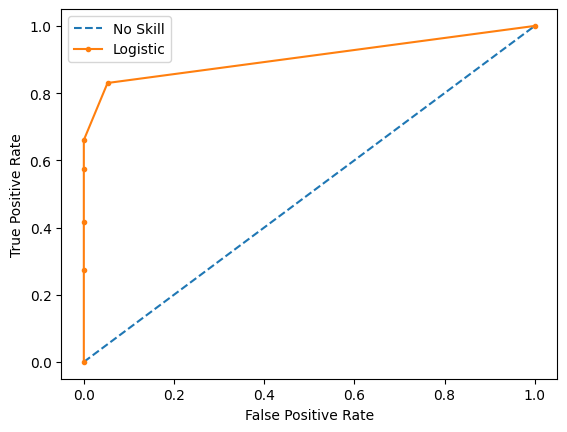

In [25]:

from matplotlib import pyplot
from numpy import sqrt, argmax, save
import numpy as np
# calculate roc curves
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_pred_prob4)
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr4, tpr4, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()


KNN: f1=0.731 auc=0.945
0.4818181818181818


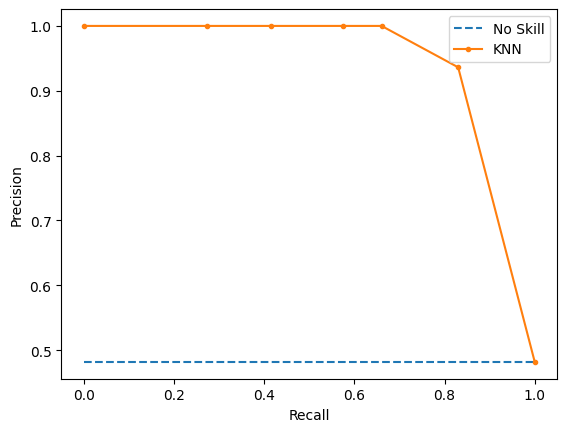

In [26]:

# presision recall graph
from sklearn.metrics import auc, precision_recall_curve, f1_score
from matplotlib import pyplot
lr_precision4, lr_recall4, thresholds4 = precision_recall_curve(y_test, y_pred_prob4)
lr_f1, lr_auc4 = f1_score(y_test, y_predicted), auc(lr_recall4, lr_precision4)
# summarize scores
print('KNN: f1=%.3f auc=%.3f' % (lr_f1, lr_auc4))
fscore = (2 * lr_precision4 * lr_recall4) / (lr_precision4 + lr_recall4)
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
print(no_skill)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall4, lr_precision4, marker='.', label='KNN')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

     

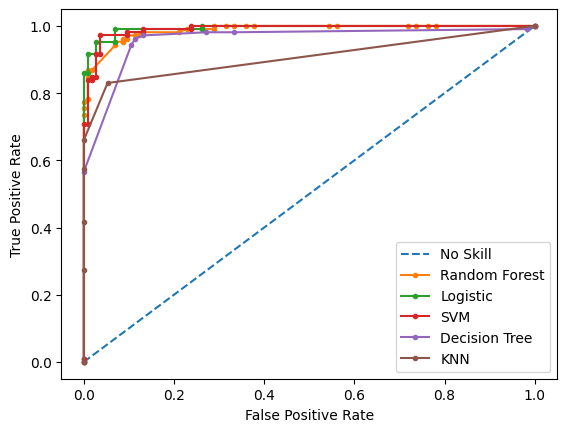

In [27]:
# all the ROC in one graph
from matplotlib import pyplot
from numpy import sqrt, argmax, save
import numpy as np
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_pred_prob4)
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Random Forest')
pyplot.plot(fpr1, tpr1, marker='.', label='Logistic')
pyplot.plot(fpr2, tpr2, marker='.', label='SVM')
pyplot.plot(fpr3, tpr3, marker='.', label='Decision Tree')
pyplot.plot(fpr4, tpr4, marker='.', label='KNN')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()


0.4818181818181818


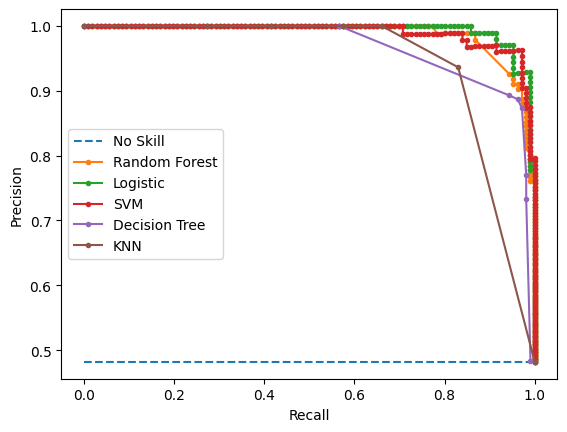

In [28]:

# all the presision recall in one graph
from matplotlib import pyplot
from numpy import sqrt, argmax, save
import numpy as np
# calculate roc curves
lr_precision, lr_recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
lr_precision1, lr_recall1, thresholds1 = precision_recall_curve(y_test, y_pred_prob1)
lr_precision2, lr_recall2, thresholds2 = precision_recall_curve(y_test, y_pred_prob2)
lr_precision3, lr_recall3, thresholds3 = precision_recall_curve(y_test, y_pred_prob3)
lr_precision4, lr_recall4, thresholds4 = precision_recall_curve(y_test, y_pred_prob4)
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
print(no_skill)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Random Forest')
pyplot.plot(lr_recall1, lr_precision1, marker='.', label='Logistic')
pyplot.plot(lr_recall2, lr_precision2, marker='.', label='SVM')
pyplot.plot(lr_recall3, lr_precision3, marker='.', label='Decision Tree')
pyplot.plot(lr_recall4, lr_precision4, marker='.', label='KNN')
# axis labels
pyplot.xlabel('Recall')

pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()
